# Check dither sequence


In [2]:
import os

import matplotlib.pyplot as plt
import numpy
import pandas

from sdsstools import yanny

In [19]:
def read_confSummary(path: str):
    y_base = yanny(path)
    columns = [col for col in y_base["FIBERMAP"].dtype.names if col != "mag"]

    fm_base = pandas.DataFrame(y_base["FIBERMAP"][columns])

    for bcol in fm_base.select_dtypes([object]):  # type: ignore
        fm_base[bcol] = fm_base[bcol].str.decode("utf-8")

    return fm_base

In [21]:
CONF_PATH = (
    "/Users/gallegoj/Code/sdss5/sdsscore_test/lco/summary_files/10003XXX/100035XX"
)

base_conf = "confSummary-10003541.par"
fm_base = read_confSummary(os.path.join(CONF_PATH, base_conf))

              ra        dec
4     359.721645 -60.682059
10      0.021672 -59.237414
16      0.139724 -60.791820
22    358.441482 -59.497290
25    358.931515 -59.897686
...          ...        ...
1468    1.075622 -60.003233
1474    0.472314 -59.337443
1480    1.570383 -60.251584
1483    0.298785 -60.727875
1498    0.368205 -60.496689

[320 rows x 2 columns]


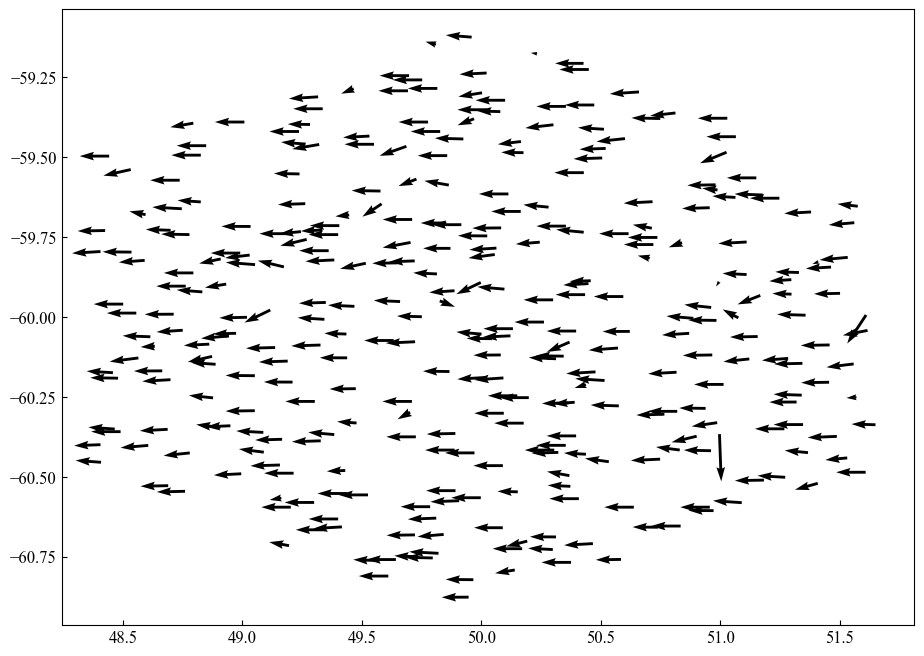

In [40]:
assigned = fm_base.loc[(fm_base.valid == 1) & (fm_base.assigned == 1)]

ra_off = (assigned.ra - assigned.racat) * numpy.cos(numpy.radians(assigned.dec))
dec_off = assigned.dec - assigned.deccat

ismall = abs(ra_off * 3600) < 1
print(assigned.loc[ismall, ["ra", "dec"]])

_, ax = plt.subplots()

ax.quiver(
    (assigned.racat.loc[ismall] + 50) % 360,
    assigned.deccat.loc[ismall],
    ra_off.loc[ismall],
    dec_off.loc[ismall],
)